<a href="https://colab.research.google.com/github/Wilkingc/Scrapping-Census-Data/blob/main/Scrapping_Census_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References

- [Census Data Website](https://www.census.gov/en.html)
- [API Key Registration](https://api.census.gov/data/key_signup.html)
- [U.S. Census Bureau YouTube Channel](https://www.youtube.com/@uscensusbureau/playlists)
- [Explore Census Data/Microdata](https://data.census.gov/)


In order to pull data from the Census Data website, you will need to generate an API Key.

What is an API Key?

- An API (Application Programming Interface) key is essentially a code that allows your application to access an API provided by another service.

**Protect your Key!!!!**

- Someone could use your key to access sensitive data or perform actions you didn't intend.


### Saving the Api key to my Vault for security

If you want to save your key in the colab Valut, follow these steps:

- Click on the Key simbol (Secrets) on the left side panel
- Clicl on (+ Add new secret)
- Give it a name and paste your key in the value box



In [28]:
from google.colab import userdata
api = userdata.get('census') # I named my key "census".

### Imports

In [2]:
import requests #Library to make request to the web
import pandas as pd #Library for data manipulation
from IPython.display import HTML, display #Library to display tables in a human readable format
from bs4 import BeautifulSoup #Library to handle and parse html
import numpy as np #Numerical Python Library
import matplotlib.pyplot as plt #Visualization librarie
import seaborn as sns #Visualization librarie
import plotly.express as px #Visualization librarie

### Pulling a table

- [American Community Survey 5-Year Data (2009-2023)](https://www.census.gov/data/developers/data-sets/acs-5year.html)

In [3]:
url = "https://api.census.gov/data/2023/acs/acs5/profile/variables.html"  # Assigning the URL to a variable.

try:
    response = requests.get(url)  # Making an HTTP GET request to the URL.
    response.raise_for_status() # Check if the HTTP request was successful.
    soup = BeautifulSoup(response.content, "html.parser")  # Parses the HTML content of the response into a BeautifulSoup object for easier navigation.

    table = soup.find("table")  # Locates the first <table> tag in the parsed HTML.

    if table:
        headers = [th.text.strip() for th in table.find_all("th")] # Extracts the text from all <th> (table header) tags, stripping whitespace.

        rows = [] # Initializes an empty list to store the table rows.
        for tr in table.find_all("tr")[1:]: # Iterates through all <tr> (table row) tags, skipping the first row (headers).
            row = [td.text.strip() for td in tr.find_all("td")] # Extracts the text from all <td> (table data) tags in each row, stripping whitespace.
            if row: # Checks if the row is not empty.
                rows.append(row) # Appends the row to the 'rows' list.

        data_profile1 = pd.DataFrame(rows, columns=headers) # Creates a Pandas DataFrame from the extracted rows and headers.
    else:
        print("Table not found on the page.") # Prints a message if no table is found.

except requests.exceptions.RequestException as e:
    print(f"Error: {e}") # Handles errors related to the HTTP request.
except Exception as e:
    print(f"An unexpected error occurred: {e}") # Handles any other unexpected errors.

In [4]:
data_profile1 #Displaying the table in a Pandas DataFrame format

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group
0,1399 variables,None,None,None,None,None,None,None
1,AIANHH,American Indian Area/Alaska Native Area/Hawaii...,,not required,,0,(not a predicate),N/A
2,AIHHTL,American Indian Area (Off-Reservation Trust La...,,not required,,0,(not a predicate),N/A
3,AIRES,American Indian Area/Alaska Native Area (Reser...,,not required,,0,(not a predicate),N/A
4,ANRC,Alaska Native Regional Corporation,,not required,,0,(not a predicate),N/A
...,...,...,...,...,...,...,...,...
1395,TRISUBREM,American Indian Area Tribal Subdivision/Remainder,,not required,,0,(not a predicate),N/A
1396,TTRACT,Tribal Census Tract,,not required,,0,(not a predicate),N/A
1397,UA,Urban Area,,not required,,0,(not a predicate),N/A
1398,ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,predicate-only,,0,ucgid,N/A


Displaying the same table with (Ipython - Display) module for a more interactive view

In [5]:
html_content = response.text  # Extracts the HTML content from the response as a string.
display(HTML(html_content))  # Displays the HTML content as rendered HTML.

### Accessing data using our API key - (Individual Values)

In [6]:
url2 = f"https://api.census.gov/data/2023/acs/acs5/profile?get=group(DP02)&for=state:35&for=us:1&key={api}" # Constructs the Census API URL, including the API key.

try:
    response = requests.get(url2) # Sends an HTTP GET request to the Census API.
    response.raise_for_status()  # Checks if the HTTP request was successful (raises an exception for errors).

    data = response.json() # Parses the JSON response from the API into a Python data structure.

    # Optional: Display as a DataFrame
    if data:
        header = data[0] # Extracts the header (column names) from the JSON data.
        rows = data[1:] # Extracts the data rows from the JSON data.
        df = pd.DataFrame(rows, columns=header) # Creates a Pandas DataFrame from the extracted data.

    else:
        print("No data returned from the API.") # Prints a message if the API returned no data.

except requests.exceptions.RequestException as e:
    print(f"Error: {e}") # Handles errors that occur during the HTTP request.
except ValueError as e:
    print(f"Error parsing JSON: {e}") # Handles errors that occur while parsing the JSON response.

In [7]:
df # Display the DataFrame

,DP02_0001E,DP02_0001EA,DP02_0001M,DP02_0001MA,DP02_0001PE,DP02_0001PEA,DP02_0001PM,DP02_0001PMA,DP02_0002E,DP02_0002EA,...,DP02_0154EA,DP02_0154M,DP02_0154MA,DP02_0154PE,DP02_0154PEA,DP02_0154PM,DP02_0154PMA,GEO_ID,NAME,state
0,825021,None,3033,None,825021,None,-888888888,(X),341592,None,...,None,4450,None,84.2,None,0.4,None,0400000US35,New Mexico,35


### Pulling a range of data pasing conditionals

In [8]:
names = data_profile1['Name'][13:53]  # Extracts a slice of names from the 'data_profile1' DataFrame, specifically rows 13 to 22, and assigns it to the 'names' variable.
years = range(2021, 2024) # Creates a range of years (2021, 2022, 2023) and assigns it to the 'years' variable.

In [9]:
result = []  # Initializes an empty list to store the results.
for year in years:  # Iterates through each year in the 'years' list.
  for i, name in enumerate(names):  # Iterates through each name in the 'names' list, along with its index.
    url = f"https://api.census.gov/data/{year}/acs/acs5/profile?get={name}&for=state:35&key={api}"  # Constructs the Census API URL for the current year and variable.

    response = requests.get(url)  # Sends an HTTP GET request to the Census API.
    if i % 10 == 0:  # Prints the progress every 5 variables to track the loop's progress.
      print(f"{i}/{len(names)}")
    if response.status_code == 200:  # Checks if the HTTP request was successful (status code 200).
        data = response.json()  # Parses the JSON response from the API into a Python data structure.
        result.append(["NM", year, name, data[1][0]])  # Appends the state, year, variable name, and the first data value to the 'result' list.
    else:
        print(f"{name} --Error: {response.status_code}") # Prints an error message if the API request failed.
        result.append(["NM", year, name, f"Error: {response.status_code}"]) # appends the error code to the result list.

result  # Displays the 'result' list.

0/40
10/40
20/40
30/40
0/40
10/40
20/40
30/40
0/40
10/40
20/40
30/40


[['NM', 2021, 'DP02_0001PE', '797596'],
 ['NM', 2021, 'DP02_0002E', '339742'],
 ['NM', 2021, 'DP02_0002PE', '42.6'],
 ['NM', 2021, 'DP02_0003E', '116880'],
 ['NM', 2021, 'DP02_0003PE', '14.7'],
 ['NM', 2021, 'DP02_0004E', '64185'],
 ['NM', 2021, 'DP02_0004PE', '8.0'],
 ['NM', 2021, 'DP02_0005E', '24900'],
 ['NM', 2021, 'DP02_0005PE', '3.1'],
 ['NM', 2021, 'DP02_0006E', '161470'],
 ['NM', 2021, 'DP02_0006PE', '20.2'],
 ['NM', 2021, 'DP02_0007E', '12318'],
 ['NM', 2021, 'DP02_0007PE', '1.5'],
 ['NM', 2021, 'DP02_0008E', '118825'],
 ['NM', 2021, 'DP02_0008PE', '14.9'],
 ['NM', 2021, 'DP02_0009E', '37509'],
 ['NM', 2021, 'DP02_0009PE', '4.7'],
 ['NM', 2021, 'DP02_0010E', '232199'],
 ['NM', 2021, 'DP02_0010PE', '29.1'],
 ['NM', 2021, 'DP02_0011E', '44225'],
 ['NM', 2021, 'DP02_0011PE', '5.5'],
 ['NM', 2021, 'DP02_0012E', '132060'],
 ['NM', 2021, 'DP02_0012PE', '16.6'],
 ['NM', 2021, 'DP02_0013E', '64732'],
 ['NM', 2021, 'DP02_0013PE', '8.1'],
 ['NM', 2021, 'DP02_0014E', '230934'],
 ['NM', 2

In [10]:
summary = pd.DataFrame(result, columns="State Year Key Value".split())  # Creates a Pandas DataFrame from the 'result' list, using the specified column names.
summary = summary.merge(data_profile1[["Label", "Name"]], how='inner', left_on="Key", right_on="Name").drop(columns=["Key"]) # Merges the 'summary' DataFrame with the 'data_profile1' DataFrame based on the 'Key' and 'Name' columns, then drops the redundant 'Key' column.
summary # Displays the resulting merged 'summary' DataFrame.

,State,Year,Value,Label,Name
0,NM,2021,797596,Percent!!HOUSEHOLDS BY TYPE!!Total households,DP02_0001PE
1,NM,2021,339742,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0002E
2,NM,2021,42.6,Percent!!HOUSEHOLDS BY TYPE!!Total households!...,DP02_0002PE
3,NM,2021,116880,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0003E
4,NM,2021,14.7,Percent!!HOUSEHOLDS BY TYPE!!Total households!...,DP02_0003PE
...,...,...,...,...,...
115,NM,2023,825021,Estimate!!RELATIONSHIP!!Population in househol...,DP02_0019E
116,NM,2023,39.8,Percent!!RELATIONSHIP!!Population in household...,DP02_0019PE
117,NM,2023,341603,Estimate!!RELATIONSHIP!!Population in househol...,DP02_0020E
118,NM,2023,16.5,Percent!!RELATIONSHIP!!Population in household...,DP02_0020PE


In [11]:
# summary.to_csv('census-data.csv', index=False)

### Data Cleaning

The dataset's shape, (120, 5), reveals 120 rows and 5 columns.

In [12]:
summary.shape

(120, 5)

To gain insights into our data, we perform descriptive analysis using methods like .info().

In [13]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   120 non-null    object
 1   Year    120 non-null    int64 
 2   Value   120 non-null    object
 3   Label   120 non-null    object
 4   Name    120 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.8+ KB


Shows the summary's descriptive statistics, with variables as rows and statistics as columns, for easier analysis.

In [14]:
summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,120.0,2022.0,0.81992,2021.0,2021.0,2022.0,2023.0,2023.0


Here we are converting the "Value" column to numbers since it was extracted as strings


In [15]:
summary["Value"] = pd.to_numeric(summary["Value"], errors="coerce")

In [16]:
summary["Name"].value_counts().head(5)

,count
Name,
DP02_0001PE,3
DP02_0002E,3
DP02_0002PE,3
DP02_0003E,3
DP02_0003PE,3


# Here we drop all the values that reprecent a percentage

In [17]:
df = summary[~summary['Name'].str.endswith('PE')].reset_index() # 1. Filtering rows from the 'summary' DataFrame where the 'Name' column does NOT end with 'PE'

In [18]:
df # Displaying the new DataFrame

,index,State,Year,Value,Label,Name
0,1,NM,2021,339742.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0002E
1,3,NM,2021,116880.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0003E
2,5,NM,2021,64185.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0004E
3,7,NM,2021,24900.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0005E
4,9,NM,2021,161470.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0006E
5,11,NM,2021,12318.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0007E
6,13,NM,2021,118825.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0008E
7,15,NM,2021,37509.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0009E
8,17,NM,2021,232199.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0010E
9,19,NM,2021,44225.00,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0011E


In [19]:
filter1 = summary["Name"] == "DP02_0003E" #Filtering the dataframe to only show rows with "DP02_0003E"

In [20]:
married_couples_with_children_under_18 = summary[filter1] # Only selecting the rows that match each other for visualization pursposes
married_couples_with_children_under_18

,State,Year,Value,Label,Name
3,NM,2021,116880.0,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0003E
43,NM,2022,116678.0,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0003E
83,NM,2023,114915.0,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0003E


In [21]:
filter2 = summary["Name"]  == "DP02_0005E"

In [22]:
cohabiting_couples = summary[filter2] # Only selecting the rows that match each other for visualization pursposes
cohabiting_couples

,State,Year,Value,Label,Name
7,NM,2021,24900.0,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0005E
47,NM,2022,26930.0,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0005E
87,NM,2023,27858.0,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,DP02_0005E


### Visualization

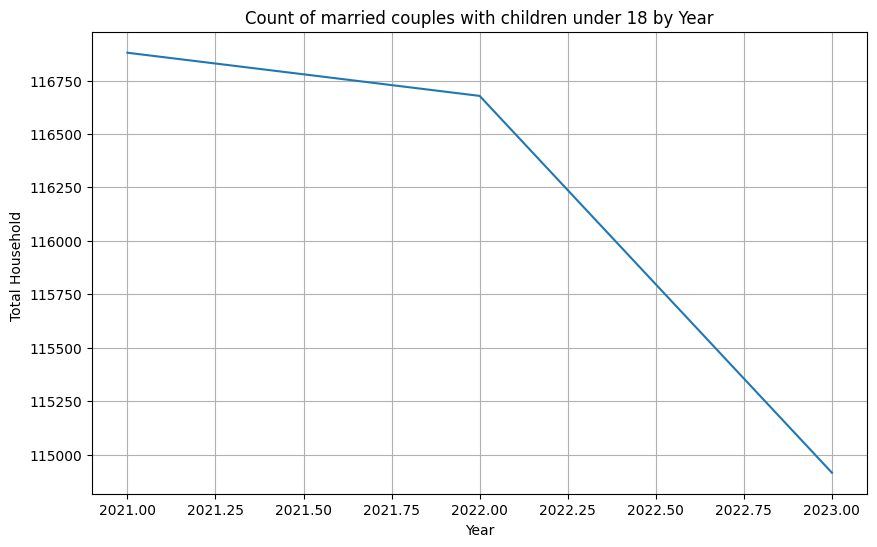

In [23]:
yearly_data = married_couples_with_children_under_18.groupby("Year")["Value"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_data["Year"], yearly_data["Value"])
plt.title('Count of married couples with children under 18 by Year')
plt.xlabel("Year")
plt.ylabel("Total Household ")
plt.grid(True)
plt.show()

In [24]:
yearly_data = married_couples_with_children_under_18.groupby("Year")["Value"].mean().reset_index()

fig_plotly = px.line(yearly_data, x="Year", y="Value",
                     title='Count of married couples with children under 18 by Year')
fig_plotly.update_xaxes(title_text="Year")
fig_plotly.update_yaxes(title_text="Total Household ")
fig_plotly.show()

In [25]:
couples = cohabiting_couples.groupby("Year")["Value"].mean().reset_index()

fig_plotly = px.line(couples, x="Year", y="Value",
                     title='Count of cohabiting couples with children under 18 by Year')
fig_plotly.update_xaxes(title_text="Year")
fig_plotly.update_yaxes(title_text="Total Household ")
fig_plotly.show()

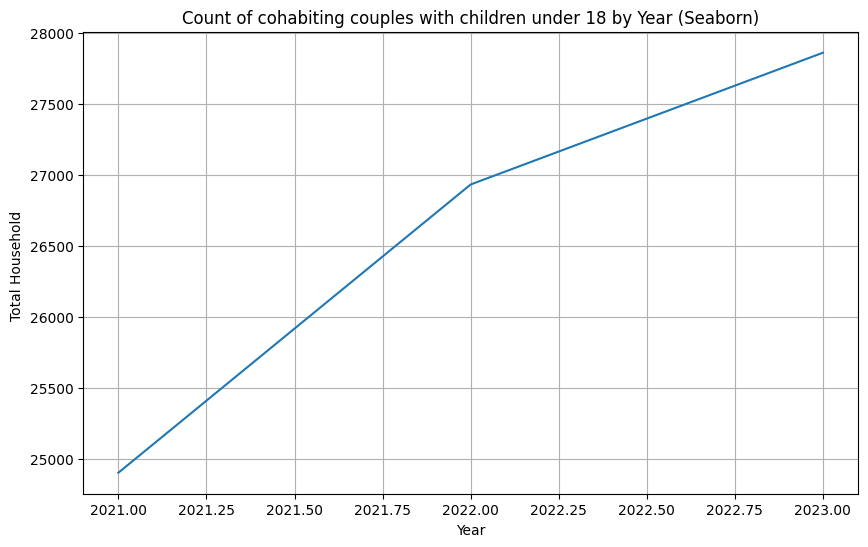

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=couples["Year"], y=couples["Value"])
plt.title('Count of cohabiting couples with children under 18 by Year (Seaborn)')
plt.xlabel("Year")
plt.ylabel("Total Household ")
plt.grid(True)
plt.show()

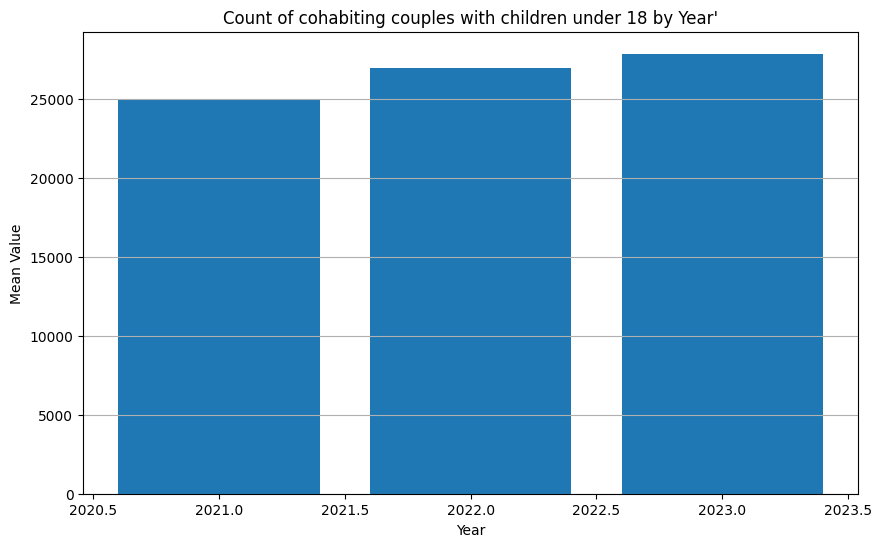

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(couples['Year'], cohabiting_couples['Value'])
plt.title("Count of cohabiting couples with children under 18 by Year'")
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.show()